## Week 9 and 10 Data Visualization Exercise

In [38]:
# First I will import some needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chardet

## Import xlsx File - CANDYDATA to Use to Create Data Visualizations

In [39]:
Candy_Data = pd.read_excel("CANDYDATA.xlsx")
Candy_Data

/Users/Robyn/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ITEM,JOY,DESPAIR,NET FEELIES,NET CLOUT,DESPAIR (NEG)
0,York Peppermint Patties,634,78,556.0,1.639118,-78.0
1,Whole Wheat anything,21,419,-398.0,1.012938,-419.0
2,White Bread,15,473,-458.0,1.123440,-473.0
3,Vicodin,323,210,113.0,1.227036,-210.0
4,Twix,770,26,744.0,1.832497,-26.0
...,...,...,...,...,...,...
82,Black Jacks,34,252,-218.0,0.658410,-252.0
83,Any full-sized candy bar,828,13,815.0,1.936093,-13.0
84,Anonymous brown globs that come in black and o...,120,663,-543.0,1.802569,-663.0
85,100 Grand Bar,570,34,536.0,1.390488,-34.0


## First I will clean the data before creating visualizations
## Filter out missing data

In [40]:
# First I will use the .notnull function to see if any of the columns 
# are missing data or not
Candy_Data.notnull()

,ITEM,JOY,DESPAIR,NET FEELIES,NET CLOUT,DESPAIR (NEG)
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
82,True,True,True,True,True,True
83,True,True,True,True,True,True
84,True,True,True,True,True,True
85,True,True,True,True,True,True


In [41]:
# As seen above it seems as if the only row that has returned a False 
# meaning we are missing data is row 86. Now I will use .dropna which 
# will drops out all rows containing missing data
Candy_Data.dropna()
# As seen below the only row that has been dropped was the last row 
# which only stated the totals.

,ITEM,JOY,DESPAIR,NET FEELIES,NET CLOUT,DESPAIR (NEG)
0,York Peppermint Patties,634,78,556.0,1.639118,-78.0
1,Whole Wheat anything,21,419,-398.0,1.012938,-419.0
2,White Bread,15,473,-458.0,1.123440,-473.0
3,Vicodin,323,210,113.0,1.227036,-210.0
4,Twix,770,26,744.0,1.832497,-26.0
...,...,...,...,...,...,...
81,Bonkers,31,99,-68.0,0.299277,-99.0
82,Black Jacks,34,252,-218.0,0.658410,-252.0
83,Any full-sized candy bar,828,13,815.0,1.936093,-13.0
84,Anonymous brown globs that come in black and o...,120,663,-543.0,1.802569,-663.0


In [42]:
df = pd.DataFrame(Candy_Data)

In [45]:
pd.set_option('display.max_rows', df.shape[0]+1)
print(df)

                                                 ITEM    JOY  DESPAIR  \
0                             York Peppermint Patties    634       78   
1                                Whole Wheat anything     21      419   
2                                         White Bread     15      473   
3                                             Vicodin    323      210   
4                                                Twix    770       26   
5                                           Trail Mix     81      247   
6                        Tolberone something or other    627       44   
7                                    Three Musketeers    534       40   
8          Those odd marshmallow circus peanut things    135      545   
9                                            Sweetums     21       92   
10                                       Swedish Fish    470      166   
11                                          Starburst    500       69   
12                                       Spotted Di

In [47]:
# remove the last row
Updated_Candy_Data = df.drop(labels=86, axis=0)
Updated_Candy_Data

,ITEM,JOY,DESPAIR,NET FEELIES,NET CLOUT,DESPAIR (NEG)
0,York Peppermint Patties,634,78,556.0,1.639118,-78.0
1,Whole Wheat anything,21,419,-398.0,1.012938,-419.0
2,White Bread,15,473,-458.0,1.123440,-473.0
3,Vicodin,323,210,113.0,1.227036,-210.0
4,Twix,770,26,744.0,1.832497,-26.0
5,Trail Mix,81,247,-166.0,0.755099,-247.0
6,Tolberone something or other,627,44,583.0,1.544730,-44.0
7,Three Musketeers,534,40,494.0,1.321424,-40.0
8,Those odd marshmallow circus peanut things,135,545,-410.0,1.565450,-545.0
9,Sweetums,21,92,-71.0,0.260141,-92.0


In [51]:
# create a dataframe with just "ITEM", "JOY", "DESPAIR"
Updated_Candy_Data = Updated_Candy_Data[["ITEM", "JOY", "DESPAIR"]]
Updated_Candy_Data

,ITEM,JOY,DESPAIR
0,York Peppermint Patties,634,78
1,Whole Wheat anything,21,419
2,White Bread,15,473
3,Vicodin,323,210
4,Twix,770,26
5,Trail Mix,81,247
6,Tolberone something or other,627,44
7,Three Musketeers,534,40
8,Those odd marshmallow circus peanut things,135,545
9,Sweetums,21,92


In [56]:
# Remove items I do not want to create a chart on
Updated_Candy_Data = Updated_Candy_Data.drop(labels=[1,2,3,5,6,8,9,11,12,13,14,15,17,18,19,20,21,22,24,25,27,28,29,30,31,32,33,34,35], axis=0)

KeyError: '[ 1  2  3  5  6  8  9 11 12 13 14 15 17 18 19 20 21 22 24 25 27 28 29 30\n 31 32 33 34 35] not found in axis'

In [58]:
# Next I will use range to delete a range of rows
Updated_Candy_Data = Updated_Candy_Data.drop(labels=range(37, 46), axis=0)
Updated_Candy_Data = Updated_Candy_Data.drop(labels=range(48, 84), axis=0)
Updated_Candy_Data

,ITEM,JOY,DESPAIR
0,York Peppermint Patties,634,78
4,Twix,770,26
7,Three Musketeers,534,40
10,Swedish Fish,470,166
16,Skittles,511,92
23,Reese’s Peanut Butter Cups,983,47
26,Peanut M&M’s,773,75
36,Milky Way,648,33
46,LaffyTaffy,293,211
47,Kit Kat,894,15


In [59]:
# I used drop again to remove Items that I forgot 
Updated_Candy_Data = Updated_Candy_Data.drop(labels=[46,84], axis=0)

## Bar Chart Visualizations

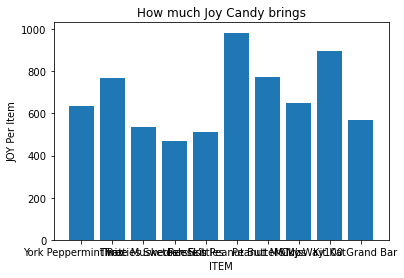

In [60]:
# The first Vizualization I will create is a bar chart through the use of matplotlib
plt.bar(Updated_Candy_Data.ITEM,Updated_Candy_Data.JOY)
plt.title('How much Joy Candy brings')
plt.xlabel('ITEM')
plt.ylabel('JOY Per Item')
plt.show()

## Scatter Plot Visualizations

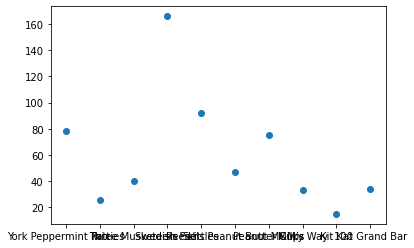

In [64]:
# Next I will create a scatter plot that shows the amount of despair for each candy bar
plt.scatter(Updated_Candy_Data.ITEM, Updated_Candy_Data.DESPAIR, marker='o')

## Line Plot Visualizations

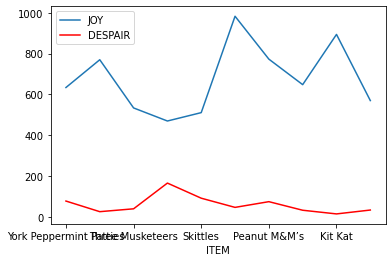

In [65]:
# Next I will create a line chart that shows the amount of joy and despair each items brings 
ax = plt.gca()

Updated_Candy_Data.plot(kind='line',x='ITEM',y='JOY',ax=ax)
Updated_Candy_Data.plot(kind='line',x='ITEM',y='DESPAIR', color='red', ax=ax)

plt.show()